In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.special import boxcox1p

from IPython.display import display
from mplfinance.original_flavor import candlestick_ohlc

import os

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [220]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error

from sklearn import metrics

In [3]:
os.chdir(r'C:\Users\USER\Documents\dev\upstage-ml-regression-sigma7\data')

In [4]:
train_file = r'train.csv'
test_file = r'test.csv'
train = pd.read_csv(train_file, encoding= 'utf-8')
test = pd.read_csv(test_file, encoding= 'utf-8')
bus = pd.read_csv('bus_feature.csv', encoding= 'utf-8')
subway = pd.read_csv('subway_feature.csv', encoding= 'utf-8')
print('train 데이터입니다.')
train


train 데이터입니다.


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


In [5]:
train['train_data'] = 1
test['train_data'] = 0

train  = pd.concat([train, test]).reset_index(drop=True)

In [6]:
train['계약년월'] = pd.to_datetime(train['계약년월'], format='%Y%m' )

train['계약년'] = train['계약년월'].dt.year
train['계약월'] = train['계약년월'].dt.month

train.drop('계약년월', axis=1, inplace=True)

In [7]:
train = train.rename(columns={'전용면적(㎡)':'전용면적'})

In [8]:
train

,시군구,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,...,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,train_data,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,1,2017,12
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,1,2017,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,1,2017,12
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,1,2018,1
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,...,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,7
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,8
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,...,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,0,2023,9


In [9]:
print('* 결측치가 100만개 이하인 변수들 :', list(train.columns[train.isnull().sum() <= 1000000]))     # 남겨질 변수들은 아래와 같습니다.
print('* 결측치가 100만개 이상인 변수들 :', list(train.columns[train.isnull().sum() >= 1000000]))

* 결측치가 100만개 이하인 변수들 : ['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'train_data', '계약년', '계약월']
* 결측치가 100만개 이상인 변수들 : ['해제사유발생일', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자']


In [10]:
train.isnull().sum().sort_values(ascending=False)

k-135㎡초과                  1127765
해제사유발생일                   1121899
k-등록일자                    1116386
단지소개기존clob                1058958
k-홈페이지                    1013523
고용보험관리번호                   920757
세대전기계약방법                   885389
k-팩스번호                     879348
k-시행사                      877834
청소비관리형태                    877751
k-건설사(시공사)                 877637
경비비관리형태                    877561
k-단지분류(아파트,주상복합등등)         877273
k-전체동수                     877207
단지승인일                      876854
k-전화번호                     876850
k-복도유형                     876454
건축면적                       876279
주차대수                       876277
k-사용검사일-사용승인일              876259
좌표X                        876232
좌표Y                        876232
단지신청일                      876187
k-수정일자                     876170
k-85㎡~135㎡이하               876170
k-전용면적별세대현황(60㎡~85㎡이하)     876170
k-전용면적별세대현황(60㎡이하)         876170
k-주거전용면적                   876170
k-관리비부과면적                  876125
k-연면적         

In [11]:
total = (
train['k-전용면적별세대현황(60㎡이하)'].fillna(0) +
train['k-전용면적별세대현황(60㎡~85㎡이하)'].fillna(0) +
train['k-85㎡~135㎡이하'].fillna(0) +
train['k-135㎡초과'].fillna(0)
)

train['소형비율'] = train['k-전용면적별세대현황(60㎡이하)'] / total
train['중소형비율'] = train['k-전용면적별세대현황(60㎡~85㎡이하)'] / total
train['중대형비율'] = train['k-85㎡~135㎡이하'] / total
train['대형비율'] = train['k-135㎡초과'] / total

In [12]:
train.drop(['해제사유발생일', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자','k-85㎡~135㎡이하','k-전용면적별세대현황(60㎡~85㎡이하)','k-전용면적별세대현황(60㎡이하)'], axis=1, inplace=True)

In [13]:
train.isnull().sum().sort_values(ascending=False)

대형비율                   1127765
고용보험관리번호                920757
세대전기계약방법                885389
k-팩스번호                  879348
k-시행사                   877834
청소비관리형태                 877751
k-건설사(시공사)              877637
중대형비율                   877611
중소형비율                   877611
소형비율                    877611
경비비관리형태                 877561
k-단지분류(아파트,주상복합등등)      877273
k-전체동수                  877207
단지승인일                   876854
k-전화번호                  876850
k-복도유형                  876454
건축면적                    876279
주차대수                    876277
k-사용검사일-사용승인일           876259
좌표X                     876232
좌표Y                     876232
단지신청일                   876187
k-수정일자                  876170
k-주거전용면적                876170
기타/의무/임대/임의=1/2/3/4     876125
사용허가여부                  876125
관리비 업로드                 876125
k-연면적                   876125
k-관리비부과면적               876125
k-전체세대수                 876125
k-난방방식                  876125
k-관리방식                  876125
k-세대타입(분

In [14]:
continuous_columns = []
categorical_columns = []

for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적', '계약일', '층', '건축년도', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', '건축면적', '주차대수', '좌표X', '좌표Y', 'target', 'train_data', '계약년', '계약월', '소형비율', '중소형비율', '중대형비율', '대형비율']
범주형 변수: ['시군구', '번지', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


In [15]:
train_main = train.copy()

In [16]:
train_main.drop(['대형비율', '고용보험관리번호', 'k-팩스번호', 'k-전화번호', 'k-수정일자','k-시행사','관리비 업로드','사용허가여부','중개사소재지','등기신청일자'],axis=1, inplace=True)

In [17]:
train_main.isnull().sum().sort_values(ascending=False)

세대전기계약방법               885389
청소비관리형태                877751
k-건설사(시공사)             877637
중대형비율                  877611
중소형비율                  877611
소형비율                   877611
경비비관리형태                877561
k-단지분류(아파트,주상복합등등)     877273
k-전체동수                 877207
단지승인일                  876854
k-복도유형                 876454
건축면적                   876279
주차대수                   876277
k-사용검사일-사용승인일          876259
좌표X                    876232
좌표Y                    876232
단지신청일                  876187
k-주거전용면적               876170
기타/의무/임대/임의=1/2/3/4    876125
k-관리비부과면적              876125
k-연면적                  876125
k-난방방식                 876125
k-관리방식                 876125
k-세대타입(분양형태)           876125
k-전체세대수                876125
target                   9272
아파트명                     2136
번지                        227
본번                         75
부번                         75
계약월                         0
계약년                         0
train_data                  0
계약일       

In [18]:
train_main[['중대형비율','중소형비율','소형비율']].fillna(0, inplace=True)

In [19]:
train_main['시군구'].value_counts()

서울특별시 노원구 상계동    45232
서울특별시 노원구 중계동    26524
서울특별시 양천구 신정동    23768
서울특별시 도봉구 창동     23222
서울특별시 구로구 구로동    22941
                 ...  
서울특별시 중구 필동1가        6
서울특별시 용산구 주성동        5
서울특별시 종로구 연지동        4
서울특별시 중구 입정동         3
서울특별시 마포구 구수동        3
Name: 시군구, Length: 339, dtype: int64

In [20]:
train_main['구'] = train_main['시군구'].apply(lambda x: str(x).split(' ')[1] if len(str(x).split(' ')) > 1 else '기타')

In [21]:
train_main['동'] = train_main['시군구'].apply(lambda x: str(x).split(' ')[2] if len(str(x).split(' ')) > 2 else '기타')

In [22]:
train_main.drop('시군구', axis=1, inplace=True)

In [23]:
train_main

,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,거래유형,...,단지신청일,target,train_data,계약년,계약월,소형비율,중소형비율,중대형비율,구,동
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,-,...,2022-11-17 10:19:06.0,124000.0,1,2017,12,0.074074,0.925926,0.000000,강남구,개포동
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,-,...,2022-11-17 10:19:06.0,123500.0,1,2017,12,0.074074,0.925926,0.000000,강남구,개포동
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,-,...,2022-11-17 10:19:06.0,91500.0,1,2017,12,0.074074,0.925926,0.000000,강남구,개포동
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,-,...,2022-11-17 10:19:06.0,130000.0,1,2018,1,0.074074,0.925926,0.000000,강남구,개포동
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,-,...,2022-11-17 10:19:06.0,117000.0,1,2018,1,0.074074,0.925926,0.000000,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,직거래,...,2014-09-01 13:05:03.0,NaN,0,2023,7,0.576320,0.359486,0.064194,중랑구,신내동
1128090,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,중개거래,...,2014-09-01 13:05:03.0,NaN,0,2023,7,0.576320,0.359486,0.064194,중랑구,신내동
1128091,816,816.0,0.0,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,중개거래,...,2014-09-01 13:05:03.0,NaN,0,2023,8,0.576320,0.359486,0.064194,중랑구,신내동
1128092,816,816.0,0.0,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,중개거래,...,2014-09-01 13:05:03.0,NaN,0,2023,9,0.576320,0.359486,0.064194,중랑구,신내동


In [24]:
target = train_main['target']
train_main.drop('target', axis=1, inplace=True  )

In [25]:
train_main['target'] = target

In [26]:
test = train_main[train_main['train_data'] == 0].drop(['train_data', 'target'], axis=1)
train_main = train_main[train_main['train_data'] == 1].drop('train_data', axis=1)



In [27]:
target = train_main['target']
target

0          124000.0
1          123500.0
2           91500.0
3          130000.0
4          117000.0
             ...   
1118817     20000.0
1118818     20000.0
1118819     28000.0
1118820     29000.0
1118821     13250.0
Name: target, Length: 1118822, dtype: float64

In [28]:
target.isnull().sum()
train_main.drop('target', axis=1, inplace=True  )

In [29]:
train_main['train_data'] = 1
test['train_data'] = 0



In [30]:
train_main = pd.concat([train_main, test]).reset_index(drop=True)

In [31]:
train_main['target'] = target

In [32]:
train_main

,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,거래유형,...,단지신청일,계약년,계약월,소형비율,중소형비율,중대형비율,구,동,train_data,target
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,-,...,2022-11-17 10:19:06.0,2017,12,0.074074,0.925926,0.000000,강남구,개포동,1,124000.0
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,-,...,2022-11-17 10:19:06.0,2017,12,0.074074,0.925926,0.000000,강남구,개포동,1,123500.0
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,-,...,2022-11-17 10:19:06.0,2017,12,0.074074,0.925926,0.000000,강남구,개포동,1,91500.0
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,-,...,2022-11-17 10:19:06.0,2018,1,0.074074,0.925926,0.000000,강남구,개포동,1,130000.0
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,-,...,2022-11-17 10:19:06.0,2018,1,0.074074,0.925926,0.000000,강남구,개포동,1,117000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,직거래,...,2014-09-01 13:05:03.0,2023,7,0.576320,0.359486,0.064194,중랑구,신내동,0,NaN
1128090,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,중개거래,...,2014-09-01 13:05:03.0,2023,7,0.576320,0.359486,0.064194,중랑구,신내동,0,NaN
1128091,816,816.0,0.0,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,중개거래,...,2014-09-01 13:05:03.0,2023,8,0.576320,0.359486,0.064194,중랑구,신내동,0,NaN
1128092,816,816.0,0.0,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,중개거래,...,2014-09-01 13:05:03.0,2023,9,0.576320,0.359486,0.064194,중랑구,신내동,0,NaN


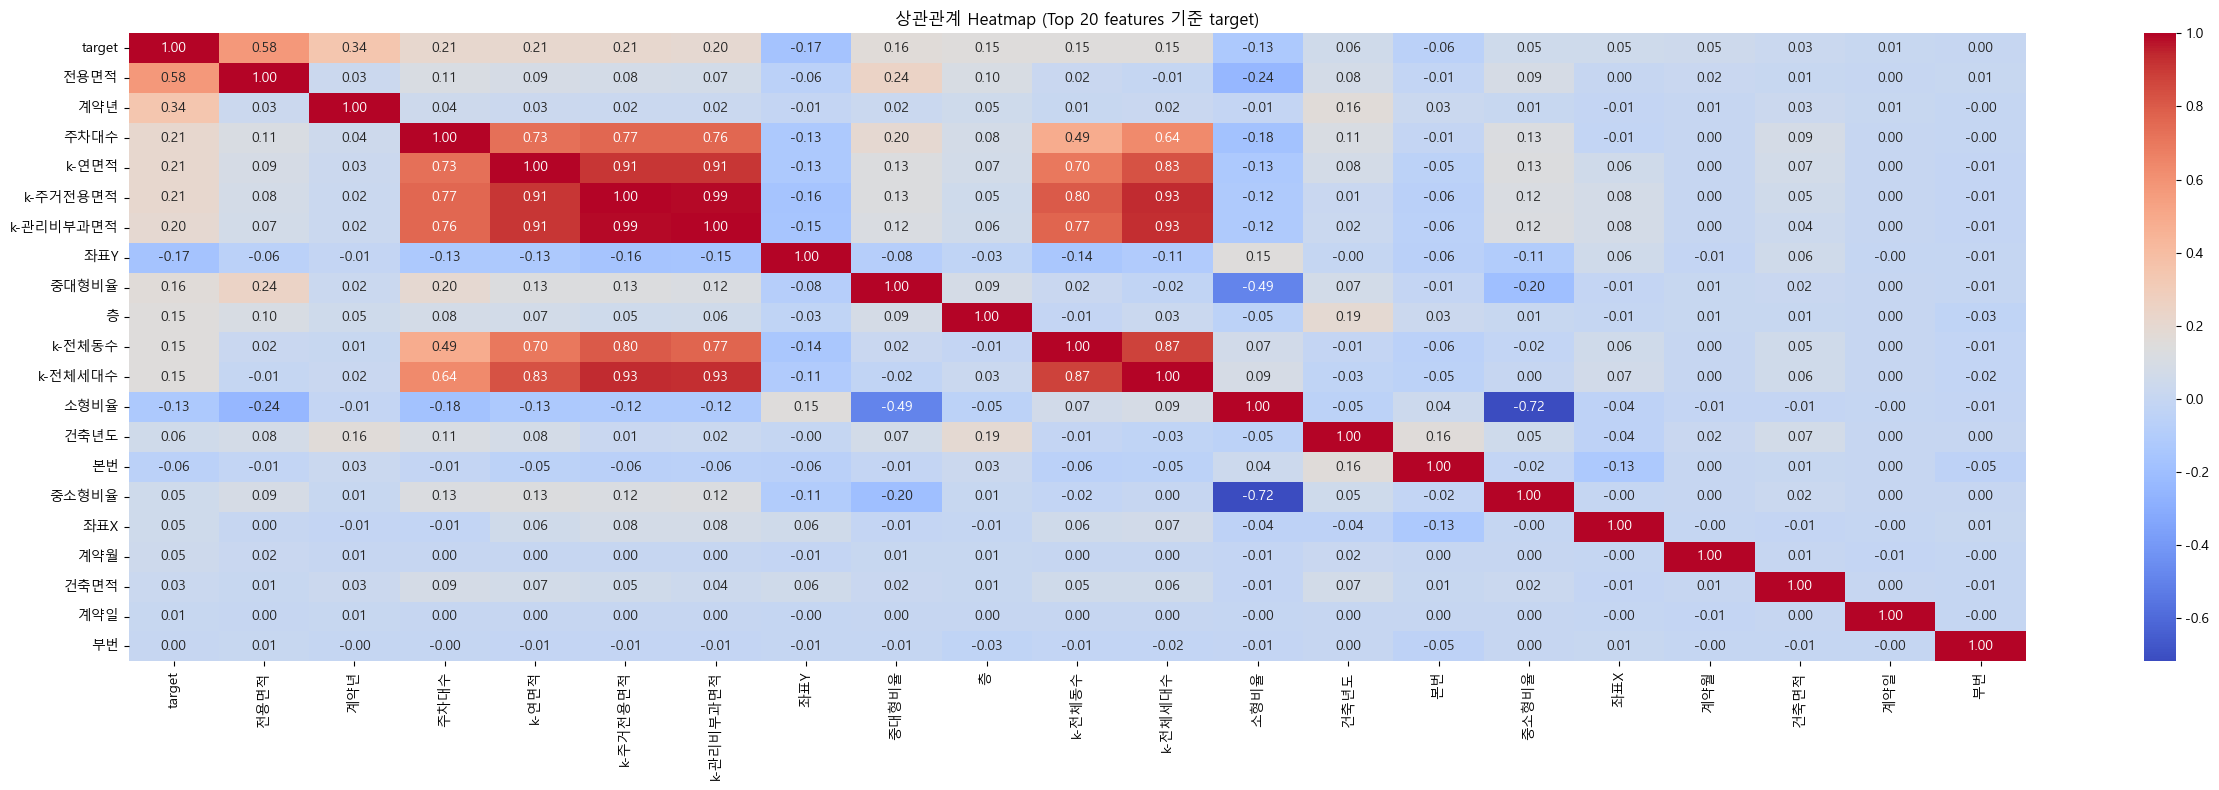

In [34]:
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
def plot_corr_heatmap(df, target_col="target", train_flag_col="train_data", topn=20):
    """
    - train 데이터만 사용
    - 수치형 변수의 target과 상관관계 계산
    - 상위 N개 변수 + target으로 heatmap 시각화
    """
    # train만 필터링
    dtrain = df[df[train_flag_col] == 1].copy()
    
    # 수치형 변수만 선택
    num_cols = dtrain.select_dtypes(include=["number"]).columns.tolist()
    if target_col in num_cols:
        pass
    else:
        num_cols.append(target_col)

    # 결측치 중앙값 대체 (상관 안정화)
    dnum = dtrain[num_cols].copy()
    dnum = dnum.fillna(dnum.median())

    # 상관계수 행렬
    corr = dnum.corr()

    # target과 상관 높은 상위 N 변수 선택
    target_corr = corr[target_col].abs().sort_values(ascending=False)
    top_features = target_corr.head(topn+1).index.tolist()  # target 포함

    # Heatmap 그리기
    plt.figure(figsize=(1.2*len(top_features), 8))
    sns.heatmap(corr.loc[top_features, top_features], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"상관관계 Heatmap (Top {topn} features 기준 {target_col})")
    plt.tight_layout()
    plt.show()

# ======================
# 사용 예시
# ======================
plot_corr_heatmap(train_main, target_col="target", train_flag_col="train_data", topn=20)

In [35]:
train_main['k-주거전용면적'].value_counts()

470140.0    3068
242461.0    2816
537573.0    2605
353089.0    2592
117086.0    2480
            ... 
38716.0        2
24878.0        2
18236.0        2
22782.0        1
37677.0        1
Name: k-주거전용면적, Length: 740, dtype: int64

In [36]:
train_main1 = train_main.copy()

In [37]:
train_main.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명', '거래유형',
       'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식',
       'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적',
       'k-관리비부과면적', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수',
       '기타/의무/임대/임의=1/2/3/4', '단지승인일', '좌표X', '좌표Y', '단지신청일', '계약년', '계약월',
       '소형비율', '중소형비율', '중대형비율', '구', '동', 'train_data', 'target'],
      dtype='object')

In [38]:
train_main.drop(['k-관리비부과면적','k-주거전용면적',], axis=1, inplace =True)

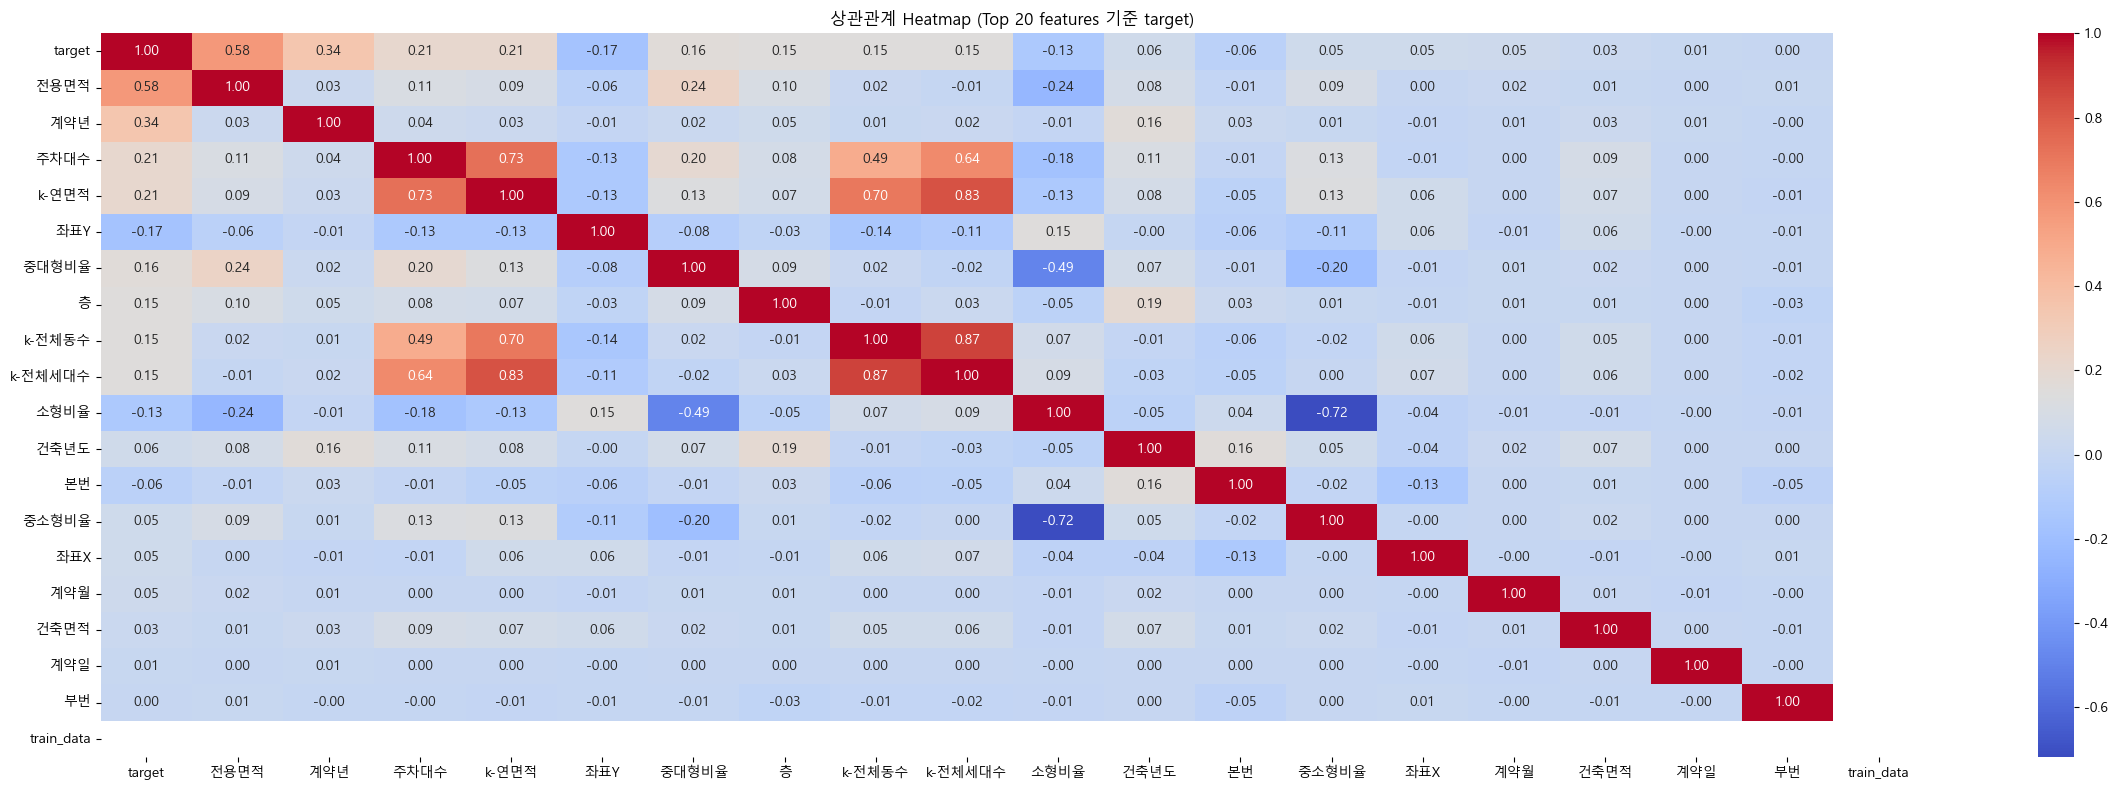

In [39]:
plot_corr_heatmap(train_main, target_col="target", train_flag_col="train_data", topn=20)

In [40]:
train_main.isnull().sum().sort_values(ascending=False)

세대전기계약방법               885389
청소비관리형태                877751
k-건설사(시공사)             877637
중대형비율                  877611
중소형비율                  877611
소형비율                   877611
경비비관리형태                877561
k-단지분류(아파트,주상복합등등)     877273
k-전체동수                 877207
단지승인일                  876854
k-복도유형                 876454
건축면적                   876279
주차대수                   876277
k-사용검사일-사용승인일          876259
좌표X                    876232
좌표Y                    876232
단지신청일                  876187
k-연면적                  876125
k-전체세대수                876125
k-난방방식                 876125
k-관리방식                 876125
기타/의무/임대/임의=1/2/3/4    876125
k-세대타입(분양형태)           876125
target                   9272
아파트명                     2136
번지                        227
본번                         75
부번                         75
거래유형                        0
도로명                         0
건축년도                        0
층                           0
계약일                         0
계약년       

In [41]:
train_main['신축여부'] = train_main['건축년도'].apply(lambda x: 1 if x >= 2009 else 0)

In [42]:
price_group = {
    "강남구": 3, "서초구": 3, "송파구": 3, "용산구": 3,
    "마포구": 2, "성동구": 2, "광진구": 2, "동작구": 2, "양천구": 2, "강동구": 2,
}
train_main["서울집값등급"] = train_main["구"].map(price_group).fillna(1)

In [114]:
train_main['서울집값등급'].value_counts()

1.0    649133
2.0    260626
3.0    218335
Name: 서울집값등급, dtype: int64

In [44]:
train_main['경도'] =  train_main['좌표X']
train_main['위도'] =  train_main['좌표Y']

In [45]:
train_main.drop(['좌표X','좌표Y'], axis=1, inplace=True)

In [46]:
train_main['아파트명'].value_counts()

현대               16779
신동아              12929
한신                9128
두산                8593
주공2               7955
                 ...  
제니스뷰                 1
다온숲                  1
포렛빌                  1
DMC금호리첸시아            1
힐스테이트세운센트럴1단지        1
Name: 아파트명, Length: 6549, dtype: int64

In [47]:
import re
import pandas as pd

# === 1) 우선순위 패턴 목록 (위에서 아래로 매칭) ===
# (정규식 패턴, 등급)
PATTERN_GRADED = [

    # ---- 5등급: 최상위 랜드마크/초고가 ----
    (r'한남더힐', 5),
    (r'나인원\s*한남|Nine\s*One\s*Hannam', 5),
    (r'PH\s*129|PH129', 5),
    (r'아크로\s*서울\s*포레스트|Acro\s*Seoul\s*Forest', 5),
    (r'아크로\s*리버\s*파크|Acro\s*River\s*Park', 5),

    # ---- 4등급: 강남권 최상위/프리미엄 플래그십 ----
    (r'원\s*베일리|원베일리|래미안\s*원\s*베일리', 4),
    (r'반포\s*자이', 4),
    (r'래미안\s*퍼스티지', 4),
    (r'압구정.*현대|현대.*압구정', 4),
    (r'디\s*에이치|THE\s*H|The\s*H', 4),             # 현대 고급 브랜드 (예: 디에이치 아너힐즈 등)
    (r'트리마제|Trimage', 4),
    (r'라클래시|래미안\s*라\s*클래시|Raemian\s*Laclass', 4),

    # ---- 3등급: 메이저 브랜드 일반/강남권 대단지 ----
    (r'래미안|Raemian', 3),
    (r'자이|Xi\b', 3),
    (r'아이\s*파크|I-?PARK|IPARK', 3),
    (r'푸르지오|Prugio', 3),
    (r'더\s*샵|The\s*Sharp', 3),
    (r'e\s*편한\s*세상|e편한세상|e-?Pyeonhansesang', 3),
    (r'센트레빌', 3),
    (r'래대푸|마포\s*래미안\s*푸르지오', 3),
    (r'헬리오\s*시티|Helio\s*City', 3),
    (r'파크리오', 3),
    (r'올림픽\s*선수촌', 3),
    (r'잠실\s*(리센츠|엘스|트리지움)', 3),

    # ---- 2등급: 준메이저/중상 브랜드, 대중적 신축/재건축 ----
    (r'힐스테이트|Hillstate', 2),
    (r'롯데\s*캐슬|Lotte\s*Castle', 2),
    (r'위브|We\'?ve', 2),
    (r'호반\s*(써밋|베르디움)', 2),
    (r'경남\s*아너스빌|아너스빌', 2),
    (r'두산', 2),
    (r'금호', 2),
    (r'벽산', 2),
    (r'현대\s*홈\s*타운', 2),

    # ---- 1등급: 기타/브랜드 미표기/중소 ----
    # 매칭 없으면 1로 처리
]

def brand_grade_from_name(name: str) -> int:
    """아파트명 문자열에서 브랜드/단지 키워드를 정규식으로 찾아 5~1등급 반환."""
    if pd.isna(name):
        return 1
    s = str(name).strip()
    # 공백/하이픈/대소문자 변형 허용을 위한 전처리(선택): 여기서는 정규식이 유연해서 생략 가능
    for pattern, grade in PATTERN_GRADED:
        if re.search(pattern, s, flags=re.IGNORECASE):
            return int(grade)
    return 1

# 사용 예시
train_main['apt_grade'] = train_main['아파트명'].apply(brand_grade_from_name).astype(int)



In [48]:
train_main['apt_grade'].value_counts()

1    885881
3    130142
2    106683
4      4218
5      1170
Name: apt_grade, dtype: int64

In [49]:
bins_map_A = {1:1, 2:2, 3:3, 4:3, 5:3}
train_main['apt_grade_bin_A'] = train_main['apt_grade'].map(bins_map_A).astype('Int64')

train_main['is_ultra_premium'] = train_main['apt_grade'].isin([4,5]).astype(int)
# apt_grade 자체(1~5) + is_ultra_premium(0/1) 병행



In [50]:
train_main['apt_grade'].value_counts()


1    885881
3    130142
2    106683
4      4218
5      1170
Name: apt_grade, dtype: int64

In [51]:
train_main

,번지,본번,부번,아파트명,전용면적,계약일,층,건축년도,도로명,거래유형,...,동,train_data,target,신축여부,서울집값등급,경도,위도,apt_grade,apt_grade_bin_A,is_ultra_premium
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,-,...,개포동,1,124000.0,0,3.0,127.05721,37.476763,1,1,0
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,-,...,개포동,1,123500.0,0,3.0,127.05721,37.476763,1,1,0
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,-,...,개포동,1,91500.0,0,3.0,127.05721,37.476763,1,1,0
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,-,...,개포동,1,130000.0,0,3.0,127.05721,37.476763,1,1,0
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,-,...,개포동,1,117000.0,0,3.0,127.05721,37.476763,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,직거래,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,1,0
1128090,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,중개거래,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,1,0
1128091,816,816.0,0.0,신내우디안1단지,101.65,27,12,2014,신내역로1길 85,중개거래,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,1,0
1128092,816,816.0,0.0,신내우디안1단지,84.94,2,18,2014,신내역로1길 85,중개거래,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,1,0


In [52]:
train_main.drop('apt_grade',axis=1, inplace=True)

In [53]:
train_main.drop(['번지','본번','아파트명', '부번', '도로명', '거래유형'],axis=1, inplace=True)

In [54]:
train_main

,전용면적,계약일,층,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,...,구,동,train_data,target,신축여부,서울집값등급,경도,위도,apt_grade_bin_A,is_ultra_premium
0,79.97,8,3,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,강남구,개포동,1,124000.0,0,3.0,127.05721,37.476763,1,0
1,79.97,22,4,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,강남구,개포동,1,123500.0,0,3.0,127.05721,37.476763,1,0
2,54.98,28,5,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,강남구,개포동,1,91500.0,0,3.0,127.05721,37.476763,1,0
3,79.97,3,4,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,강남구,개포동,1,130000.0,0,3.0,127.05721,37.476763,1,0
4,79.97,8,2,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,강남구,개포동,1,117000.0,0,3.0,127.05721,37.476763,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,84.65,19,13,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,중랑구,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0
1128090,84.62,25,12,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,중랑구,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0
1128091,101.65,27,12,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,중랑구,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0
1128092,84.94,2,18,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,중랑구,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0


In [55]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 37 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   전용면적                 1128094 non-null  float64
 1   계약일                  1128094 non-null  int64  
 2   층                    1128094 non-null  int64  
 3   건축년도                 1128094 non-null  int64  
 4   k-단지분류(아파트,주상복합등등)   250821 non-null   object 
 5   k-세대타입(분양형태)         251969 non-null   object 
 6   k-관리방식               251969 non-null   object 
 7   k-복도유형               251640 non-null   object 
 8   k-난방방식               251969 non-null   object 
 9   k-전체동수               250887 non-null   float64
 10  k-전체세대수              251969 non-null   float64
 11  k-건설사(시공사)           250457 non-null   object 
 12  k-사용검사일-사용승인일        251835 non-null   object 
 13  k-연면적                251969 non-null   float64
 14  경비비관리형태              250533 non-null   object 
 15

In [ ]:
import re

company_score_3 = {
    '삼성물산': 3,
    '현대건설': 3,
    'GS건설': 3,
    'DL이앤씨': 2,
    'HDC현대산업개발': 2,
    '대우건설': 2,
    '포스코건설': 2,
    '롯데건설': 2,
    '호반건설': 1,
    '금호건설': 1,
    '쌍용건설': 1,
    '두산건설': 1,
}

def match_company_score(name: str) -> int:
    if pd.isna(name):
        return 1  # 결측치 -> 기타
    for comp, score in company_score_3.items():
        if re.search(comp, str(name)):
            return score
    return 1  # 어떤 회사명도 매칭 안 되면 '기타' = 1

train_main['건설사구분'] = train_main['k-건설사(시공사)'].apply(match_company_score).astype(int)



In [57]:
train_main

,전용면적,계약일,층,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,...,동,train_data,target,신축여부,서울집값등급,경도,위도,apt_grade_bin_A,is_ultra_premium,건설사구분
0,79.97,8,3,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,개포동,1,124000.0,0,3.0,127.05721,37.476763,1,0,1
1,79.97,22,4,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,개포동,1,123500.0,0,3.0,127.05721,37.476763,1,0,1
2,54.98,28,5,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,개포동,1,91500.0,0,3.0,127.05721,37.476763,1,0,1
3,79.97,3,4,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,개포동,1,130000.0,0,3.0,127.05721,37.476763,1,0,1
4,79.97,8,2,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,개포동,1,117000.0,0,3.0,127.05721,37.476763,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,84.65,19,13,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0,1
1128090,84.62,25,12,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0,1
1128091,101.65,27,12,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0,1
1128092,84.94,2,18,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,신내동,0,NaN,1,1.0,127.10672,37.618870,1,0,1


In [58]:
continuous_columns= []
categorical_columns = []
for column in train_main.columns:
    if pd.api.types.is_numeric_dtype(train_main[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

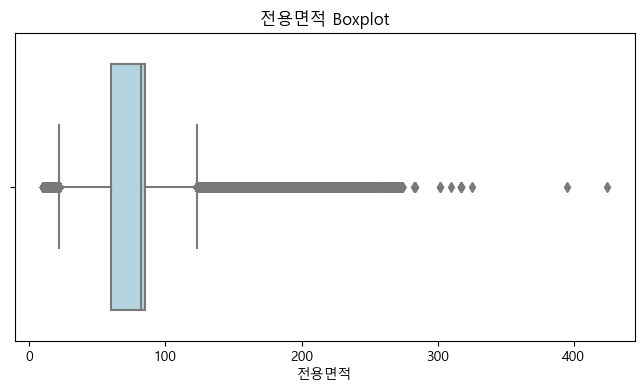

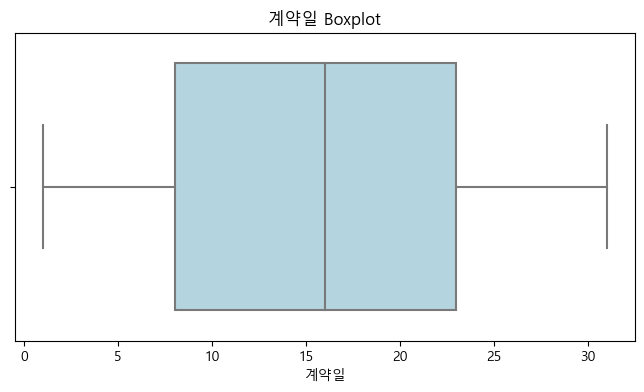

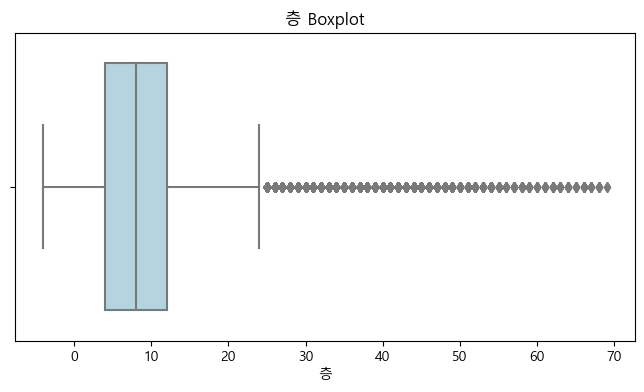

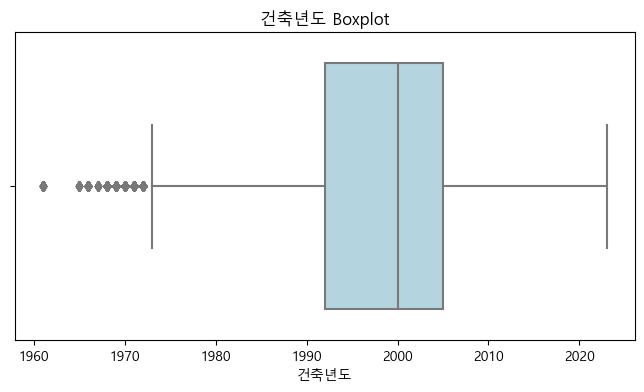

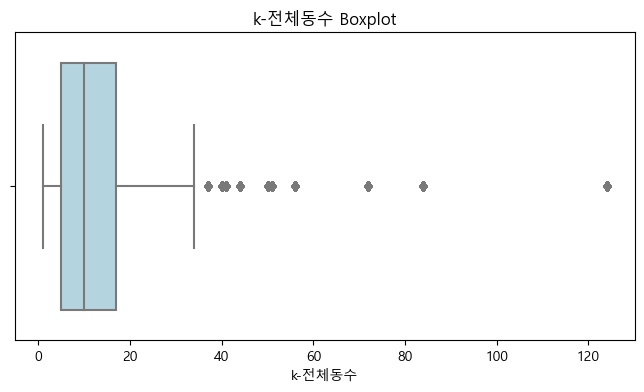

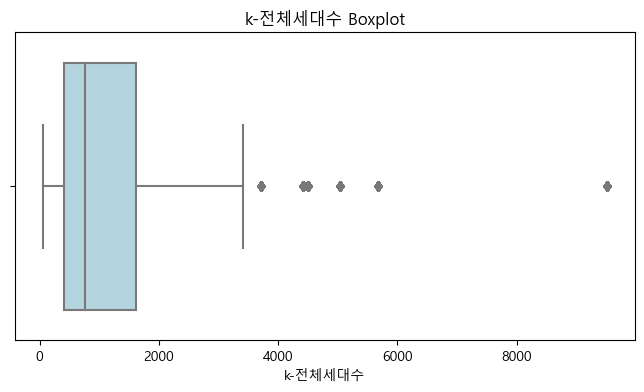

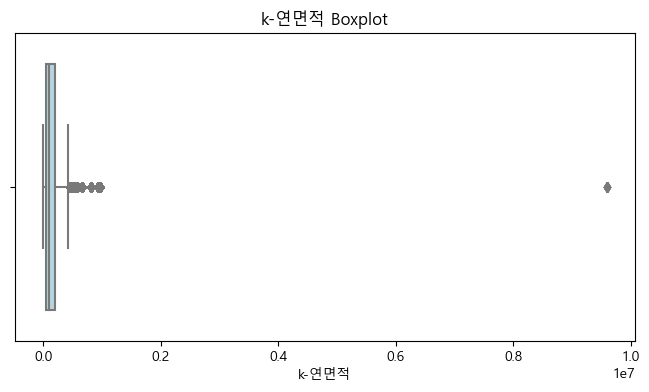

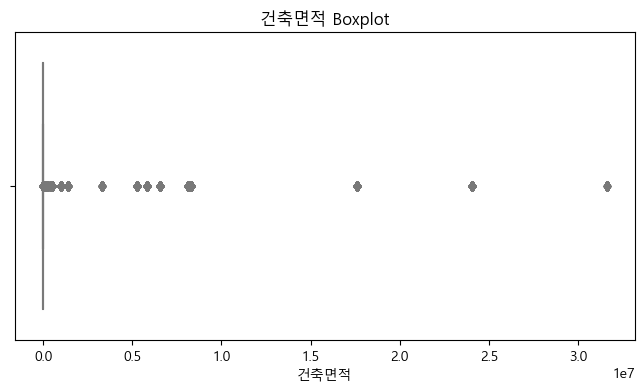

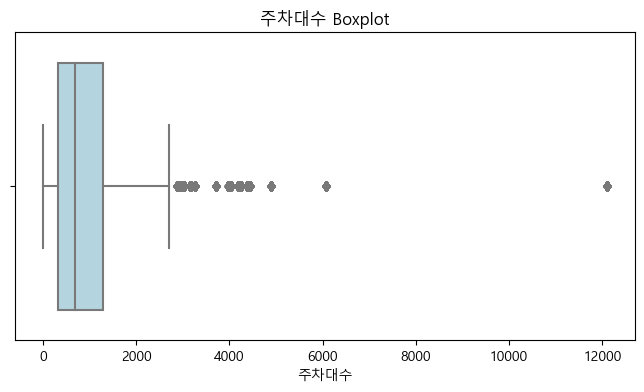

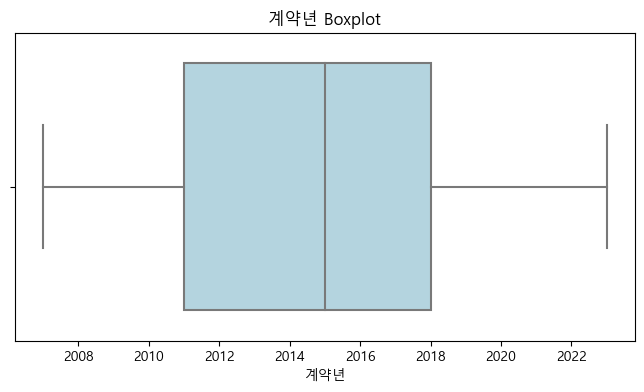

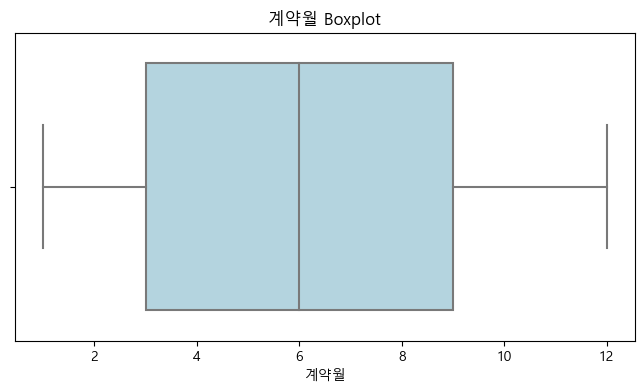

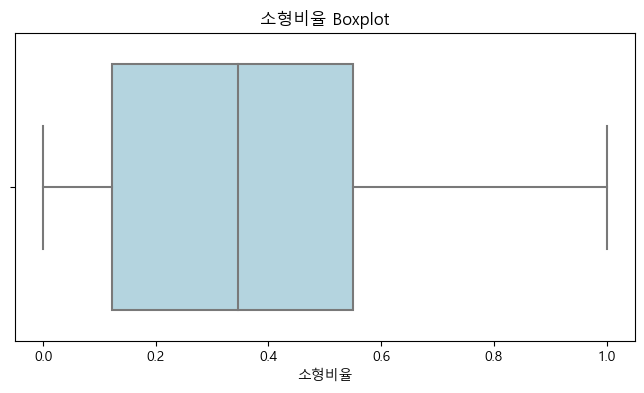

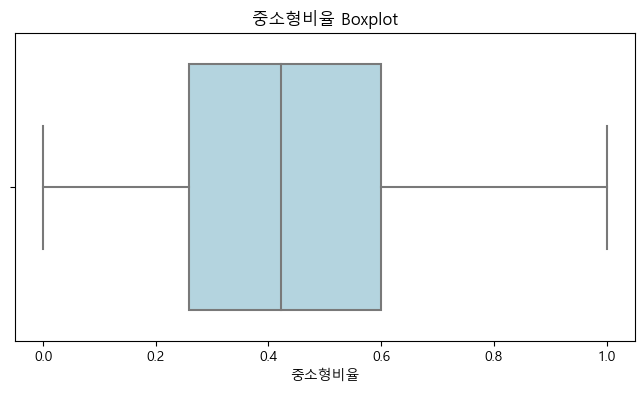

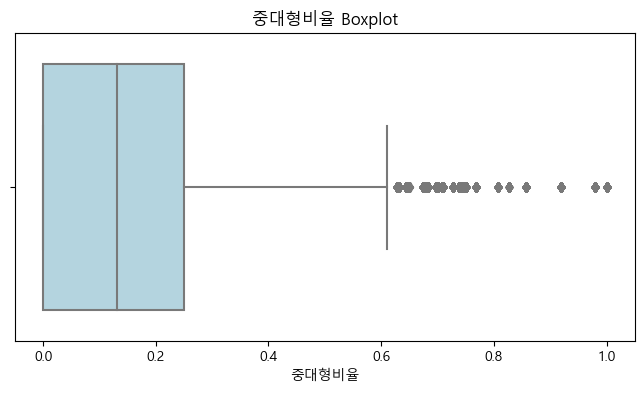

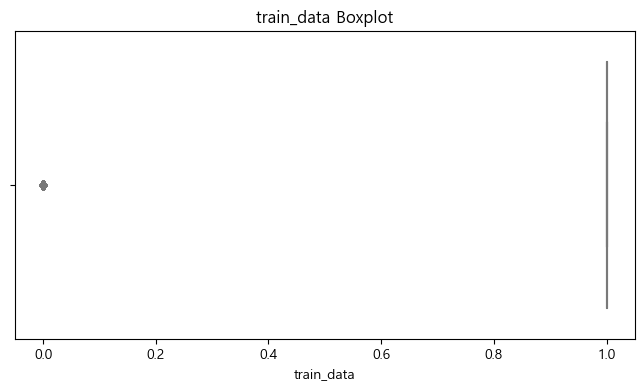

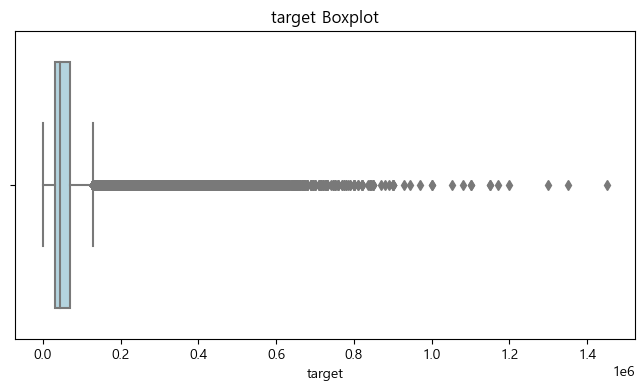

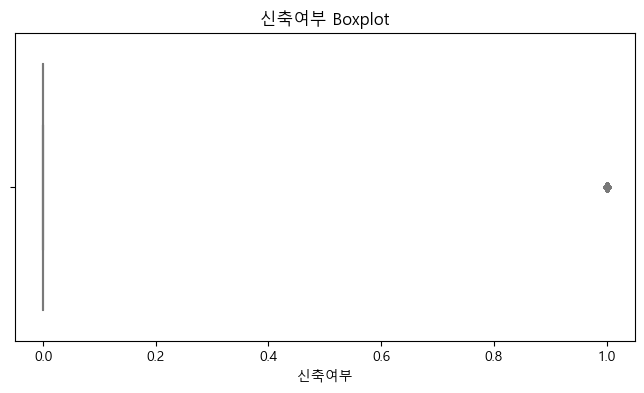

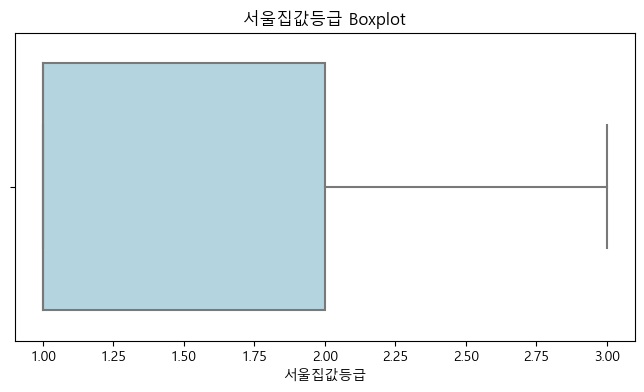

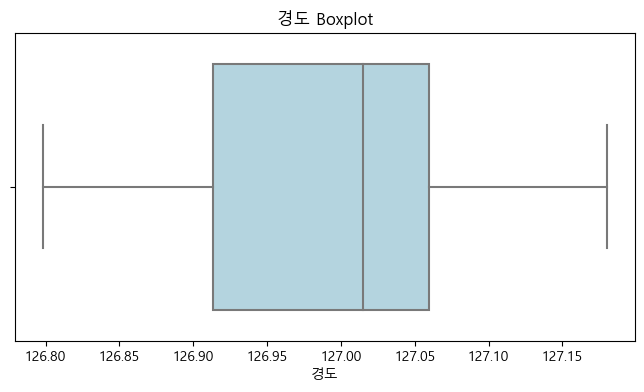

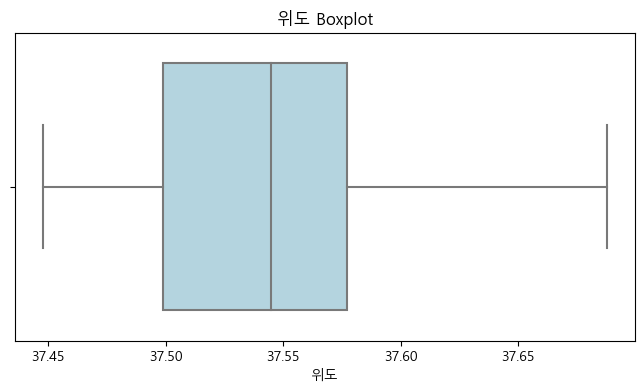

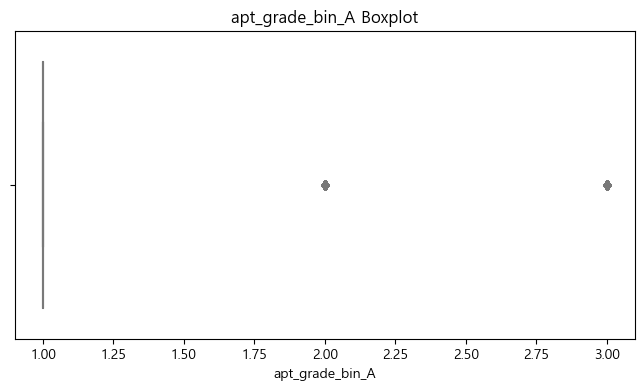

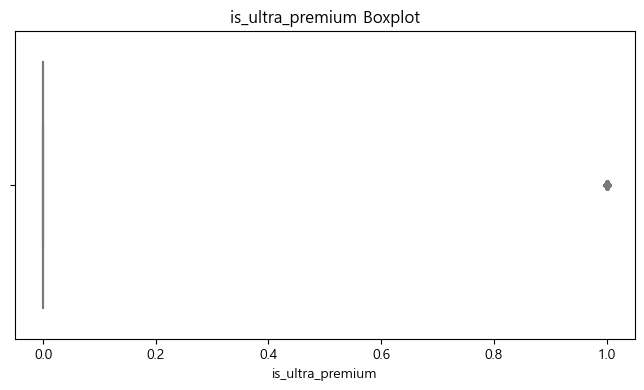

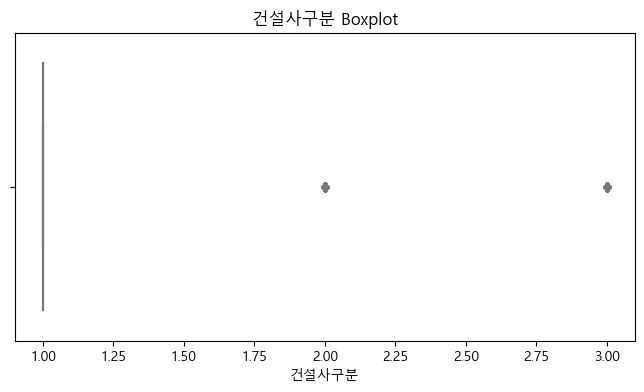

In [59]:
for col in continuous_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=train_main, x=col, color="lightblue")
    plt.title(f"{col} Boxplot")
    plt.show()

In [60]:
train_main.describe()

,전용면적,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,건축면적,주차대수,계약년,...,중대형비율,train_data,target,신축여부,서울집값등급,경도,위도,apt_grade_bin_A,is_ultra_premium,건설사구분
count,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,250887.000000,251969.000000,2.519690e+05,2.518150e+05,251817.000000,1.128094e+06,...,250483.000000,1.128094e+06,1.118822e+06,1.128094e+06,1.128094e+06,251862.000000,251862.000000,1128094.0,1.128094e+06,1.128094e+06
mean,7.716028e+01,1.579966e+01,8.881412e+00,1.998791e+03,14.810871,1186.767436,1.619010e+05,1.904915e+05,1068.300798,2.014765e+03,...,0.179713,9.917808e-01,5.799153e+04,1.347875e-01,1.618119e+00,126.995315,37.545760,1.334851,4.776198e-03,1.069607e+00
std,2.936448e+01,8.722162e+00,5.989302e+00,9.358540e+00,17.682771,1197.452046,1.843113e+05,1.735029e+06,1247.315587,4.237117e+00,...,0.231895,9.028635e-02,4.642602e+04,3.414966e-01,7.893890e-01,0.091001,0.052457,0.680447,6.894483e-02,3.481766e-01
min,1.002000e+01,1.000000e+00,-4.000000e+00,1.961000e+03,1.000000,59.000000,0.000000e+00,0.000000e+00,0.000000,2.007000e+03,...,0.000000,0.000000e+00,3.500000e+02,0.000000e+00,1.000000e+00,126.798318,37.447843,1.0,0.000000e+00,1.000000e+00
25%,5.965000e+01,8.000000e+00,4.000000e+00,1.992000e+03,5.000000,405.000000,5.366600e+04,0.000000e+00,316.000000,2.011000e+03,...,0.000000,1.000000e+00,3.050000e+04,0.000000e+00,1.000000e+00,126.913157,37.498830,1.0,0.000000e+00,1.000000e+00
50%,8.187000e+01,1.600000e+01,8.000000e+00,2.000000e+03,10.000000,768.000000,1.026240e+05,1.735000e+03,683.000000,2.015000e+03,...,0.131455,1.000000e+00,4.480000e+04,0.000000e+00,1.000000e+00,127.014971,37.544936,1.0,0.000000e+00,1.000000e+00
75%,8.496000e+01,2.300000e+01,1.200000e+01,2.005000e+03,17.000000,1622.000000,2.039040e+05,8.414210e+03,1284.000000,2.018000e+03,...,0.250000,1.000000e+00,6.980000e+04,0.000000e+00,2.000000e+00,127.059590,37.577117,1.0,0.000000e+00,1.000000e+00
max,4.243200e+02,3.100000e+01,6.900000e+01,2.023000e+03,124.000000,9510.000000,9.591851e+06,3.159620e+07,12096.000000,2.023000e+03,...,1.000000,1.000000e+00,1.450000e+06,1.000000e+00,3.000000e+00,127.179998,37.687725,3.0,1.000000e+00,3.000000e+00


In [ ]:
cols = [
    "층",
    "k-전체동수",
    "k-전체세대수",
    "k-연면적",
    "전용면적",
    "주차대수",
    '건축면적'
]
train_main[col].fillna(0, inplace=True)

In [71]:
log_cols = [
    "층",
    "k-전체동수",
    "k-전체세대수",
    "k-연면적",
    "전용면적",
    "주차대수",
    '건축면적'
]

# 새로운 컬럼명은 _log를 붙여서 추가
for col in log_cols:
    if col in train_main.columns:
        # 음수/0 방지: 0보다 작은 값은 0으로 클리핑 후 log1p 적용
        train_main[col + "_log"] = np.log1p(train_main[col].clip(lower=0))

In [72]:

# 로그 변환한 컬럼 리스트
log_cols = [
    "층_log",
    "k-전체동수_log",
    "k-전체세대수_log",
    "k-연면적_log",
    "전용면적_log",
    "주차대수_log",
    "건축면적_log"
]

# 0값 비율 확인
zero_check = {}
for col in log_cols:
    if col in train_main.columns:
        zero_ratio = (train_main[col] == 0).mean()
        zero_count = (train_main[col] == 0).sum()
        zero_check[col] = {"zero_count": zero_count, "zero_ratio": round(zero_ratio, 4)}

zero_report = pd.DataFrame(zero_check).T.sort_values("zero_ratio", ascending=False)
print("로그 변환 컬럼별 0값 현황")
display(zero_report)

로그 변환 컬럼별 0값 현황


,zero_count,zero_ratio
건축면적_log,118394.0,0.1050
주차대수_log,18141.0,0.0161
k-연면적_log,1082.0,0.0010
층_log,264.0,0.0002
k-전체동수_log,0.0,0.0000
k-전체세대수_log,0.0,0.0000
전용면적_log,0.0,0.0000


In [73]:
train_main.describe()

,전용면적,계약일,층,건축년도,k-전체동수,k-전체세대수,k-연면적,건축면적,주차대수,계약년,...,apt_grade_bin_A,is_ultra_premium,건설사구분,층_log,k-전체동수_log,k-전체세대수_log,k-연면적_log,전용면적_log,주차대수_log,건축면적_log
count,1.128094e+06,1.128094e+06,1.128094e+06,1.128094e+06,250887.000000,251969.000000,2.519690e+05,2.518150e+05,251817.000000,1.128094e+06,...,1128094.0,1.128094e+06,1.128094e+06,1.128094e+06,250887.000000,251969.000000,251969.000000,1.128094e+06,251817.000000,251815.000000
mean,7.716028e+01,1.579966e+01,8.881412e+00,1.998791e+03,14.810871,1186.767436,1.619010e+05,1.904915e+05,1068.300798,2.014765e+03,...,1.334851,4.776198e-03,1.069607e+00,2.093839e+00,2.360534,6.674074,11.504140,4.288214e+00,6.023942,4.863562
std,2.936448e+01,8.722162e+00,5.989302e+00,9.358540e+00,17.682771,1197.452046,1.843113e+05,1.735029e+06,1247.315587,4.237117e+00,...,0.680447,6.894483e-02,3.481766e-01,6.604246e-01,0.875434,0.901249,1.207740,3.895357e-01,2.104851,4.743497
min,1.002000e+01,1.000000e+00,-4.000000e+00,1.961000e+03,1.000000,59.000000,0.000000e+00,0.000000e+00,0.000000,2.007000e+03,...,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.693147,4.094345,0.000000,2.399712e+00,0.000000,0.000000
25%,5.965000e+01,8.000000e+00,4.000000e+00,1.992000e+03,5.000000,405.000000,5.366600e+04,0.000000e+00,316.000000,2.011000e+03,...,1.0,0.000000e+00,1.000000e+00,1.609438e+00,1.791759,6.006353,10.890554,4.105120e+00,5.758902,0.000000
50%,8.187000e+01,1.600000e+01,8.000000e+00,2.000000e+03,10.000000,768.000000,1.026240e+05,1.735000e+03,683.000000,2.015000e+03,...,1.0,0.000000e+00,1.000000e+00,2.197225e+00,2.397895,6.645091,11.538837,4.417273e+00,6.527958,7.459339
75%,8.496000e+01,2.300000e+01,1.200000e+01,2.005000e+03,17.000000,1622.000000,2.039040e+05,8.414210e+03,1284.000000,2.018000e+03,...,1.0,0.000000e+00,1.000000e+00,2.564949e+00,2.890372,7.392032,12.225409,4.453882e+00,7.158514,9.037796
max,4.243200e+02,3.100000e+01,6.900000e+01,2.023000e+03,124.000000,9510.000000,9.591851e+06,3.159620e+07,12096.000000,2.023000e+03,...,3.0,1.000000e+00,3.000000e+00,4.248495e+00,4.828314,9.160204,16.076425,6.052842e+00,9.400713,17.268547


In [74]:
train_main

,전용면적,계약일,층,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,...,apt_grade_bin_A,is_ultra_premium,건설사구분,층_log,k-전체동수_log,k-전체세대수_log,k-연면적_log,전용면적_log,주차대수_log,건축면적_log
0,79.97,8,3,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,1,0,1,1.386294,2.197225,5.602119,10.027385,4.394079,5.572154,8.488588
1,79.97,22,4,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,1,0,1,1.609438,2.197225,5.602119,10.027385,4.394079,5.572154,8.488588
2,54.98,28,5,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,1,0,1,1.791759,2.197225,5.602119,10.027385,4.024994,5.572154,8.488588
3,79.97,3,4,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,1,0,1,1.609438,2.197225,5.602119,10.027385,4.394079,5.572154,8.488588
4,79.97,8,2,1987,아파트,분양,자치관리,계단식,개별난방,8.0,...,1,0,1,1.098612,2.197225,5.602119,10.027385,4.394079,5.572154,8.488588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,84.65,19,13,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,1,0,1,2.639057,2.833213,7.246368,12.159332,4.450269,7.358194,9.559023
1128090,84.62,25,12,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,1,0,1,2.564949,2.833213,7.246368,12.159332,4.449919,7.358194,9.559023
1128091,101.65,27,12,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,1,0,1,2.564949,2.833213,7.246368,12.159332,4.631325,7.358194,9.559023
1128092,84.94,2,18,2014,아파트,기타,위탁관리,혼합식,개별난방,16.0,...,1,0,1,2.944439,2.833213,7.246368,12.159332,4.453649,7.358194,9.559023


In [79]:
train_main.drop(cols,axis=1, inplace=True)

In [80]:
train_main

,계약일,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-건설사(시공사),k-사용검사일-사용승인일,경비비관리형태,...,위도,apt_grade_bin_A,is_ultra_premium,건설사구분,층_log,k-전체동수_log,k-전체세대수_log,k-연면적_log,전용면적_log,주차대수_log
0,8,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,37.476763,1,0,1,1.386294,2.197225,5.602119,10.027385,4.394079,5.572154
1,22,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,37.476763,1,0,1,1.609438,2.197225,5.602119,10.027385,4.394079,5.572154
2,28,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,37.476763,1,0,1,1.791759,2.197225,5.602119,10.027385,4.024994,5.572154
3,3,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,37.476763,1,0,1,1.609438,2.197225,5.602119,10.027385,4.394079,5.572154
4,8,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,37.476763,1,0,1,1.098612,2.197225,5.602119,10.027385,4.394079,5.572154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,19,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,37.618870,1,0,1,2.639057,2.833213,7.246368,12.159332,4.450269,7.358194
1128090,25,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,37.618870,1,0,1,2.564949,2.833213,7.246368,12.159332,4.449919,7.358194
1128091,27,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,37.618870,1,0,1,2.564949,2.833213,7.246368,12.159332,4.631325,7.358194
1128092,2,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,37.618870,1,0,1,2.944439,2.833213,7.246368,12.159332,4.453649,7.358194


In [81]:
all = list(train_main['구'].unique())
gangnam = ['강서구', '영등포구', '동작구', '서초구', '강남구', '송파구', '강동구']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)

In [83]:
is_gangnam = []
for x in train_main['구'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# 파생변수를 하나 만릅니다.
train_main['강남여부'] = is_gangnam

In [84]:
train_main['신축여부'] = train_main['건축년도'].apply(lambda x: 1 if x >= 2009 else 0)

In [85]:
bus.columns = ['노드ID', '정류소번호', '정류소명', '경도', '위도', '정류소 타입' ]

In [90]:
subway.columns

Index(['역사_ID', '역사명', '호선', '위도', '경도'], dtype='object')

In [87]:
from sklearn.neighbors import BallTree

# ===== 파라미터 =====
BUS_LIMIT_M = 300          # 500~800m 중 네가 원하는 값으로 변경
EARTH_RADIUS_KM = 6371.0

# ===== 입력 =====
# train: 집 좌표가 들어있는 DF, 컬럼명 예시 ['위도','경도']
# subway: 지하철역 DF, 컬럼명 예시 ['역사명','위도','경도']
# 결측/비정상 좌표 제거 (선택)
train_ = train_main.dropna(subset=['위도','경도']).copy()
bus_ = bus.dropna(subset=['위도','경도']).copy()

# ===== 라디안 변환 =====
train_coords_rad  = np.radians(train_[['위도','경도']].values)
bus_coords_rad = np.radians(bus_[['위도','경도']].values)

# ===== BallTree (하버사인) =====
tree = BallTree(bus_coords_rad, metric='haversine')

# 반경(m) -> 라디안
radius_rad = (BUS_LIMIT_M / 1000.0) / EARTH_RADIUS_KM

# 반경 내 존재 여부 (binary)
inside_indices = tree.query_radius(train_coords_rad, r=radius_rad)
train_['bus_nearby'] = [1 if len(idxs) > 0 else 0 for idxs in inside_indices]

# 가장 가까운 지하철역까지의 거리(미터) & 이름(옵션)
# BallTree.query 반환 거리 단위: 라디안 -> m 로 변환
dist_rad, ind = tree.query(train_coords_rad, k=1)
nearest_dist_m = dist_rad[:, 0] * EARTH_RADIUS_KM * 1000.0
nearest_idx = ind[:, 0]

train_['nearest_bus_dist_m'] = nearest_dist_m.round(1)
train_['nearest_bus_name'] = bus_.iloc[nearest_idx]['정류소명'].values


train_main[['bus_nearby','nearest_bus_dist_m','nearest_bus_name']] = \
    train_.reindex(train.index)[['bus_nearby','nearest_bus_dist_m','nearest_bus_name']]


In [94]:

# ===== 파라미터 =====
SUBWAY_LIMIT_M = 800
EARTH_RADIUS_KM = 6371.0

# ===== 좌표 숫자화 & 결측 제거 =====
for df in (train_main, subway):
    df[['위도','경도']] = df[['위도','경도']].apply(pd.to_numeric, errors='coerce')

train_  = train_main.dropna(subset=['위도','경도']).copy()
subway_ = subway.dropna(subset=['위도','경도']).copy()

# ===== 라디안 변환 (반드시 [위도, 경도] 순서) =====
train_coords_rad  = np.radians(train_[['위도','경도']].to_numpy())
subway_coords_rad = np.radians(subway_[['위도','경도']].to_numpy())

# ===== BallTree (haversine) =====
subway_tree = BallTree(subway_coords_rad, metric='haversine')

# 반경(m) -> 라디안
radius_rad = (SUBWAY_LIMIT_M / 1000.0) / EARTH_RADIUS_KM

# 반경 내 존재 여부 (binary)
inside_indices = subway_tree.query_radius(train_coords_rad, r=radius_rad)
train_['subway_nearby'] = np.fromiter((len(ix) > 0 for ix in inside_indices), dtype=int, count=len(train_))

# 가장 가까운 지하철역까지의 거리(미터) & 이름
# query 반환 거리는 라디안 -> 미터로 변환
dist_rad, ind = subway_tree.query(train_coords_rad, k=1)
nearest_dist_m = dist_rad[:, 0] * EARTH_RADIUS_KM * 1000.0
nearest_idx    = ind[:, 0]

train_['nearest_subway_dist_m'] = nearest_dist_m.round(1)
train_['nearest_subway_name']   = subway_.iloc[nearest_idx]['역사명'].to_numpy()

# ===== 원본 인덱스에 정렬해서 할당 =====
cols = ['subway_nearby','nearest_subway_dist_m','nearest_subway_name']
train_main[cols] = train_.reindex(train_main.index)[cols]


서울역         6
김포공항        5
공덕          5
디지털미디어시티    4
홍대입구        4
           ..
버티고개        1
송산          1
어룡          1
곤제          1
종각          1
Name: 역사명, Length: 640, dtype: int64

In [95]:
train_main

,계약일,건축년도,"k-단지분류(아파트,주상복합등등)",k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-건설사(시공사),k-사용검사일-사용승인일,경비비관리형태,...,k-연면적_log,전용면적_log,주차대수_log,강남여부,bus_nearby,nearest_bus_dist_m,nearest_bus_name,subway_nearby,nearest_subway_dist_m,nearest_subway_name
0,8,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,10.027385,4.394079,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡
1,22,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,10.027385,4.394079,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡
2,28,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,10.027385,4.024994,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡
3,3,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,10.027385,4.394079,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡
4,8,1987,아파트,분양,자치관리,계단식,개별난방,우성건설,1987-11-21 00:00:00.0,직영,...,10.027385,4.394079,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,19,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,12.159332,4.450269,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내
1128090,25,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,12.159332,4.449919,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내
1128091,27,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,12.159332,4.631325,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내
1128092,2,2014,아파트,기타,위탁관리,혼합식,개별난방,한신공영(주),2014-06-18 00:00:00.0,위탁,...,12.159332,4.453649,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내


In [98]:
import re

company_score_3 = {
    '삼성물산': 3,
    '현대건설': 3,
    'GS건설': 3,
    'DL이앤씨': 2,
    'HDC현대산업개발': 2,
    '대우건설': 2,
    '포스코건설': 2,
    '롯데건설': 2,
    '호반건설': 1,
    '금호건설': 1,
    '쌍용건설': 1,
    '두산건설': 1,
}

def match_company_score(name: str) -> int:
    if pd.isna(name):
        return 1  # 결측치 -> 기타
    for comp, score in company_score_3.items():
        if re.search(comp, str(name)):
            return score
    return 1  # 어떤 회사명도 매칭 안 되면 '기타' = 1

train_main['건설사구분'] = train_main['k-건설사(시공사)'].apply(match_company_score).astype(int)


In [100]:
train_main.columns

Index(['계약일', '건축년도', 'k-단지분류(아파트,주상복합등등)', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-건설사(시공사)', 'k-사용검사일-사용승인일', '경비비관리형태', '세대전기계약방법',
       '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '단지신청일', '계약년', '계약월',
       '소형비율', '중소형비율', '중대형비율', '구', '동', 'train_data', 'target', '신축여부',
       '서울집값등급', '경도', '위도', 'apt_grade_bin_A', 'is_ultra_premium', '건설사구분',
       '층_log', 'k-전체동수_log', 'k-전체세대수_log', 'k-연면적_log', '전용면적_log',
       '주차대수_log', '강남여부', 'bus_nearby', 'nearest_bus_dist_m',
       'nearest_bus_name', 'subway_nearby', 'nearest_subway_dist_m',
       'nearest_subway_name'],
      dtype='object')

In [111]:
train_main['계약년'].value_counts()

2015    119891
2017    104893
2016     99253
2014     85130
2020     83711
2018     81413
2019     74696
2009     73491
2013     67865
2007     58767
2008     57012
2011     54513
2010     44457
2021     43117
2012     40851
2023     26820
2022     12214
Name: 계약년, dtype: int64

In [112]:
train_main.drop(['k-사용검사일-사용승인일','k-건설사(시공사)','단지신청일','단지승인일','기타/의무/임대/임의=1/2/3/4','계약일','k-단지분류(아파트,주상복합등등)','k-세대타입(분양형태)','k-관리방식','경비비관리형태','세대전기계약방법',
                 '청소비관리형태'],axis=1, inplace=True)

In [115]:
train_main.columns

Index(['건축년도', 'k-복도유형', 'k-난방방식', '계약년', '계약월', '소형비율', '중소형비율', '중대형비율', '구',
       '동', 'train_data', 'target', '신축여부', '서울집값등급', '경도', '위도',
       'apt_grade_bin_A', 'is_ultra_premium', '건설사구분', '층_log', 'k-전체동수_log',
       'k-전체세대수_log', 'k-연면적_log', '전용면적_log', '주차대수_log', '강남여부',
       'bus_nearby', 'nearest_bus_dist_m', 'nearest_bus_name', 'subway_nearby',
       'nearest_subway_dist_m', 'nearest_subway_name'],
      dtype='object')

In [116]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 32 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   건축년도                   1128094 non-null  int64  
 1   k-복도유형                 251640 non-null   object 
 2   k-난방방식                 251969 non-null   object 
 3   계약년                    1128094 non-null  int64  
 4   계약월                    1128094 non-null  int64  
 5   소형비율                   250483 non-null   float64
 6   중소형비율                  250483 non-null   float64
 7   중대형비율                  250483 non-null   float64
 8   구                      1128094 non-null  object 
 9   동                      1128094 non-null  object 
 10  train_data             1128094 non-null  int64  
 11  target                 1118822 non-null  float64
 12  신축여부                   1128094 non-null  int64  
 13  서울집값등급                 1128094 non-null  float64
 14  경도                

In [117]:
continuous_columns= []
categorical_columns = []
for column in train_main.columns:
    if pd.api.types.is_numeric_dtype(train_main[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

In [119]:

categorical_columns

['k-복도유형', 'k-난방방식', '구', '동', 'nearest_bus_name', 'nearest_subway_name']

In [120]:
continuous_columns

['건축년도',
 '계약년',
 '계약월',
 '소형비율',
 '중소형비율',
 '중대형비율',
 'train_data',
 'target',
 '신축여부',
 '서울집값등급',
 '경도',
 '위도',
 'apt_grade_bin_A',
 'is_ultra_premium',
 '건설사구분',
 '층_log',
 'k-전체동수_log',
 'k-전체세대수_log',
 'k-연면적_log',
 '전용면적_log',
 '주차대수_log',
 '강남여부',
 'bus_nearby',
 'nearest_bus_dist_m',
 'subway_nearby',
 'nearest_subway_dist_m']

In [133]:
target = train_main['target']

In [149]:
train_main = train_main.fillna(0)

In [150]:
train_main.isnull().sum().sort_values(ascending=False)

건축년도                     0
건설사구분                    0
nearest_subway_name      0
nearest_subway_dist_m    0
subway_nearby            0
nearest_bus_name         0
nearest_bus_dist_m       0
bus_nearby               0
강남여부                     0
주차대수_log                 0
전용면적_log                 0
k-연면적_log                0
k-전체세대수_log              0
k-전체동수_log               0
층_log                    0
is_ultra_premium         0
k-복도유형                   0
apt_grade_bin_A          0
위도                       0
경도                       0
서울집값등급                   0
신축여부                     0
동                        0
구                        0
중대형비율                    0
중소형비율                    0
소형비율                     0
계약월                      0
계약년                      0
k-난방방식                   0
train_data               0
dtype: int64

In [162]:
train_main['train_data']= 1
test['train_data']= 0
train_main = pd.concat([train_main, test]).reset_index(drop=True)
train_main['target'] = target

In [163]:
train_main

,건축년도,k-복도유형,k-난방방식,계약년,계약월,소형비율,중소형비율,중대형비율,구,동,...,주차대수_log,강남여부,bus_nearby,nearest_bus_dist_m,nearest_bus_name,subway_nearby,nearest_subway_dist_m,nearest_subway_name,train_data,target
0,1987,계단식,개별난방,2017,12,0.074074,0.925926,0.000000,강남구,개포동,...,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡,1,124000.0
1,1987,계단식,개별난방,2017,12,0.074074,0.925926,0.000000,강남구,개포동,...,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡,1,123500.0
2,1987,계단식,개별난방,2017,12,0.074074,0.925926,0.000000,강남구,개포동,...,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡,1,91500.0
3,1987,계단식,개별난방,2018,1,0.074074,0.925926,0.000000,강남구,개포동,...,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡,1,130000.0
4,1987,계단식,개별난방,2018,1,0.074074,0.925926,0.000000,강남구,개포동,...,5.572154,1,1.0,61.8,개포우성아파트,0.0,1129.8,구룡,1,117000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146633,2014,혼합식,개별난방,2023,7,0.576320,0.359486,0.064194,중랑구,신내동,...,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내,0,NaN
1146634,2014,혼합식,개별난방,2023,7,0.576320,0.359486,0.064194,중랑구,신내동,...,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내,0,NaN
1146635,2014,혼합식,개별난방,2023,8,0.576320,0.359486,0.064194,중랑구,신내동,...,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내,0,NaN
1146636,2014,혼합식,개별난방,2023,9,0.576320,0.359486,0.064194,중랑구,신내동,...,7.358194,0,1.0,59.5,우디안아파트114동앞,1.0,733.3,신내,0,NaN


In [175]:
train_main.columns

Index(['건축년도', 'k-복도유형', 'k-난방방식', '계약년', '계약월', '소형비율', '중소형비율', '중대형비율', '구',
       '동', '신축여부', '서울집값등급', '경도', '위도', 'apt_grade_bin_A',
       'is_ultra_premium', '건설사구분', '층_log', 'k-전체동수_log', 'k-전체세대수_log',
       'k-연면적_log', '전용면적_log', '주차대수_log', '강남여부', 'bus_nearby',
       'nearest_bus_dist_m', 'nearest_bus_name', 'subway_nearby',
       'nearest_subway_dist_m', 'nearest_subway_name', 'train_data', 'target'],
      dtype='object')

In [176]:
# 원본 DF
df = train_main.copy()

# 원본 컬럼 (질문에서 준 순서)
base_cols = [
    '건축년도','k-복도유형','k-난방방식','계약년','계약월','소형비율','중소형비율','중대형비율',
    '구','동','신축여부','서울집값등급','경도','위도','apt_grade_bin_A',
    'is_ultra_premium','건설사구분','층_log','k-전체동수_log','k-전체세대수_log',
    'k-연면적_log','전용면적_log','주차대수_log','강남여부','bus_nearby',
    'nearest_bus_dist_m','nearest_bus_name','subway_nearby',
    'nearest_subway_dist_m','nearest_subway_name','train_data','target'
]
# 실제 존재하는 것만 사용(안전)
base_cols = [c for c in base_cols if c in df.columns]
df = df[base_cols].copy()


In [177]:
import numpy as np
import pandas as pd

# 파생
if {'계약년','건축년도'}.issubset(df.columns):
    df['건물연차'] = (df['계약년'] - df['건축년도']).clip(lower=0, upper=100)
else:
    df['건물연차'] = np.nan

if '계약월' in df.columns:
    df['계약월_sin'] = np.sin(2*np.pi*df['계약월']/12)
    df['계약월_cos'] = np.cos(2*np.pi*df['계약월']/12)
else:
    df['계약월_sin'] = np.nan
    df['계약월_cos'] = np.nan

# '동' → 빈도 인코딩 (고카디널리티 방지)
if '동' in df.columns:
    dong_freq = df['동'].value_counts(normalize=True)
    df['동_freq'] = df['동'].map(dong_freq).astype(float)
else:
    df['동_freq'] = np.nan

# 이름 컬럼 드랍
for c in ['nearest_bus_name','nearest_subway_name']:
    if c in df.columns:
        df.drop(columns=c, inplace=True)


In [191]:
df_test = df.query('train_data==0')
df_train = df.query('train_data==1')

df_train.drop(['train_data'], axis=1, inplace=True)
df_test.drop(['train_data'], axis=1, inplace= True)
df_train.shape, df_test.shape

((1137366, 33), (9272, 33))

In [193]:
df_test['target'] = 0

In [194]:
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in df_train.columns:
    if pd.api.types.is_numeric_dtype(df_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

연속형 변수: ['건축년도', '계약년', '계약월', '소형비율', '중소형비율', '중대형비율', '신축여부', '서울집값등급', '경도', '위도', 'apt_grade_bin_A', 'is_ultra_premium', '건설사구분', '층_log', 'k-전체동수_log', 'k-전체세대수_log', 'k-연면적_log', '전용면적_log', '주차대수_log', '강남여부', 'bus_nearby', 'nearest_bus_dist_m', 'subway_nearby', 'nearest_subway_dist_m', 'target', '건물연차', '계약월_sin', '계약월_cos', '동_freq']
범주형 변수: ['k-복도유형', 'k-난방방식', '구', '동']


In [195]:
from tqdm import tqdm
label_encoders = {}

for col in tqdm(categorical_columns_v2):
    lbl = LabelEncoder()

    lbl.fit( df_train[col].astype(str))
    df_train[col] = lbl.transform(df_train[col].astype(str))
    label_encoders[col] = lbl

    for label in np.unique(df_test[col]):
        if label not in lbl.classes_:
            lbl.classes_ = np.append(lbl.classes_, label)

    df_test[col] = lbl.transform(df_test[col].astype(str))

100%|██████████| 4/4 [00:00<00:00,  8.49it/s]


In [196]:
df_train.head()

,건축년도,k-복도유형,k-난방방식,계약년,계약월,소형비율,중소형비율,중대형비율,구,동,...,강남여부,bus_nearby,nearest_bus_dist_m,subway_nearby,nearest_subway_dist_m,target,건물연차,계약월_sin,계약월_cos,동_freq
0,1987,1,1,2017,12,0.074074,0.925926,0.0,0,8,...,1,1.0,61.8,0.0,1129.8,124000.0,30,-2.449294e-16,1.000000,0.010894
1,1987,1,1,2017,12,0.074074,0.925926,0.0,0,8,...,1,1.0,61.8,0.0,1129.8,123500.0,30,-2.449294e-16,1.000000,0.010894
2,1987,1,1,2017,12,0.074074,0.925926,0.0,0,8,...,1,1.0,61.8,0.0,1129.8,91500.0,30,-2.449294e-16,1.000000,0.010894
3,1987,1,1,2018,1,0.074074,0.925926,0.0,0,8,...,1,1.0,61.8,0.0,1129.8,130000.0,31,5.000000e-01,0.866025,0.010894
4,1987,1,1,2018,1,0.074074,0.925926,0.0,0,8,...,1,1.0,61.8,0.0,1129.8,117000.0,31,5.000000e-01,0.866025,0.010894


In [210]:
df_std = df_train.copy()
df_test_std = df_test.copy()

In [211]:
import pandas as pd

# 표준화할 컬럼 리스트 (예시: num_cols)
num_cols = [
    '건물연차','계약월_sin','계약월_cos',
    '층_log','k-전체동수_log','k-전체세대수_log','k-연면적_log','전용면적_log','주차대수_log',
    '서울집값등급','소형비율','중소형비율','중대형비율',
    'nearest_bus_dist_m','nearest_subway_dist_m','동_freq'
]

# 원본 복사

# for문으로 각 컬럼 표준화
for col in num_cols:
    mean = df_std[col].mean()
    std = df_std[col].std()
    df_std[col] = (df_std[col] - mean) / std

for col in num_cols:
    mean = df_test_std[col].mean()
    std = df_test_std[col].std()
    df_test_std[col] = (df_test_std[col] - mean) / std

print(df_std[num_cols].head())


       건물연차   계약월_sin   계약월_cos     층_log  k-전체동수_log  k-전체세대수_log  k-연면적_log  \
0  1.453900 -0.013498  1.533855 -1.072612    1.566721     1.458796   1.542428   
1  1.453900 -0.013498  1.533855 -0.734769    1.566721     1.458796   1.542428   
2  1.453900 -0.013498  1.533855 -0.458730    1.566721     1.458796   1.542428   
3  1.557815  0.692314  1.342904 -0.734769    1.566721     1.458796   1.542428   
4  1.557815  0.692314  1.342904 -1.508168    1.566721     1.458796   1.542428   

   전용면적_log  주차대수_log    서울집값등급      소형비율     중소형비율     중대형비율  \
0  0.272230  1.562823  1.750351 -0.057378  3.699747 -0.301766   
1  0.272230  1.562823  1.750351 -0.057378  3.699747 -0.301766   
2 -0.674821  1.562823  1.750351 -0.057378  3.699747 -0.301766   
3  0.272230  1.562823  1.750351 -0.057378  3.699747 -0.301766   
4  0.272230  1.562823  1.750351 -0.057378  3.699747 -0.301766   

   nearest_bus_dist_m  nearest_subway_dist_m    동_freq  
0            0.572439               3.598838  0.125924  
1       

In [212]:
df_minmax = df_train.copy()
df_test_minmax = df_test.copy()

In [213]:
import pandas as pd

# 정규화할 컬럼 리스트 (예시: num_cols)
num_cols = [
    '건물연차','계약월_sin','계약월_cos',
    '층_log','k-전체동수_log','k-전체세대수_log','k-연면적_log','전용면적_log','주차대수_log',
    '서울집값등급','소형비율','중소형비율','중대형비율',
    'nearest_bus_dist_m','nearest_subway_dist_m','동_freq'
]




# for문으로 각 컬럼 정규화 (0~1 사이로 변환)
for col in num_cols:
    min_val = df_minmax[col].min()
    max_val = df_minmax[col].max()
    if max_val != min_val:  # 0으로 나누기 방지
        df_minmax[col] = (df_minmax[col] - min_val) / (max_val - min_val)
    else:
        df_minmax[col] = 0.0  # 값이 전부 같으면 0으로 처리
# 테스트 세트
for col in num_cols:
    min_val = df_test_minmax[col].min()
    max_val = df_test_minmax[col].max()
    if max_val != min_val:  # 0으로 나누기 방지
        df_test_minmax[col] = (df_test_minmax[col] - min_val) / (max_val - min_val)
    else:
        df_test_minmax[col] = 0.0  # 값이 전부 같으면 0으로 처리
print(df_minmax[num_cols].head())



       건물연차  계약월_sin   계약월_cos     층_log  k-전체동수_log  k-전체세대수_log  k-연면적_log  \
0  0.483871     0.50  1.000000  0.326302    0.455071     0.611571   0.623732   
1  0.483871     0.50  1.000000  0.378825    0.455071     0.611571   0.623732   
2  0.483871     0.50  1.000000  0.421740    0.455071     0.611571   0.623732   
3  0.500000     0.75  0.933013  0.378825    0.455071     0.611571   0.623732   
4  0.500000     0.75  0.933013  0.258589    0.455071     0.611571   0.623732   

   전용면적_log  주차대수_log  서울집값등급      소형비율     중소형비율  중대형비율  nearest_bus_dist_m  \
0  0.545934  0.592737     1.0  0.074074  0.925926    0.0            0.131154   
1  0.545934  0.592737     1.0  0.074074  0.925926    0.0            0.131154   
2  0.444901  0.592737     1.0  0.074074  0.925926    0.0            0.131154   
3  0.545934  0.592737     1.0  0.074074  0.925926    0.0            0.131154   
4  0.545934  0.592737     1.0  0.074074  0.925926    0.0            0.131154   

   nearest_subway_dist_m    동_freq  
0

In [214]:
df_std

,건축년도,k-복도유형,k-난방방식,계약년,계약월,소형비율,중소형비율,중대형비율,구,동,...,강남여부,bus_nearby,nearest_bus_dist_m,subway_nearby,nearest_subway_dist_m,target,건물연차,계약월_sin,계약월_cos,동_freq
0,1987,1,1,2017,12,-0.057378,3.699747,-0.301766,0,8,...,1,1.0,0.572439,0.0,3.598838,124000.0,1.453900,-0.013498,1.533855,0.125924
1,1987,1,1,2017,12,-0.057378,3.699747,-0.301766,0,8,...,1,1.0,0.572439,0.0,3.598838,123500.0,1.453900,-0.013498,1.533855,0.125924
2,1987,1,1,2017,12,-0.057378,3.699747,-0.301766,0,8,...,1,1.0,0.572439,0.0,3.598838,91500.0,1.453900,-0.013498,1.533855,0.125924
3,1987,1,1,2018,1,-0.057378,3.699747,-0.301766,0,8,...,1,1.0,0.572439,0.0,3.598838,130000.0,1.557815,0.692314,1.342904,0.125924
4,1987,1,1,2018,1,-0.057378,3.699747,-0.301766,0,8,...,1,1.0,0.572439,0.0,3.598838,117000.0,1.557815,0.692314,1.342904,0.125924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137361,2014,5,1,2023,7,2.171717,1.175893,0.183120,24,174,...,0,1.0,0.533582,1.0,2.178339,NaN,-0.728308,-0.719310,-1.125744,0.165615
1137362,2014,5,1,2023,7,2.171717,1.175893,0.183120,24,174,...,0,1.0,0.533582,1.0,2.178339,NaN,-0.728308,-0.719310,-1.125744,0.165615
1137363,2014,5,1,2023,8,2.171717,1.175893,0.183120,24,174,...,0,1.0,0.533582,1.0,2.178339,NaN,-0.728308,-1.236000,-0.604058,0.165615
1137364,2014,5,1,2023,9,2.171717,1.175893,0.183120,24,174,...,0,1.0,0.533582,1.0,2.178339,NaN,-0.728308,-1.425121,0.108580,0.165615


In [215]:
df_test_std

,건축년도,k-복도유형,k-난방방식,계약년,계약월,소형비율,중소형비율,중대형비율,구,동,...,강남여부,bus_nearby,nearest_bus_dist_m,subway_nearby,nearest_subway_dist_m,target,건물연차,계약월_sin,계약월_cos,동_freq
1137366,1987,1,1,2023,7,-0.173370,3.232469,-0.336259,0,8,...,1,1.0,0.377233,0.0,3.235455,0,1.434274,1.194442,-1.004904,0.254529
1137367,2021,1,4,2023,8,-0.479077,-0.523964,7.022712,0,8,...,1,1.0,1.355025,1.0,0.497610,0,-1.606916,-0.590675,0.171990,0.254529
1137368,1984,5,4,2023,7,-0.479077,-0.523964,7.022712,0,8,...,1,1.0,0.933143,1.0,0.853520,0,1.702614,1.194442,-1.004904,0.254529
1137369,1984,5,4,2023,8,-0.479077,-0.523964,7.022712,0,8,...,1,1.0,0.933143,1.0,0.853520,0,1.702614,-0.590675,0.171990,0.254529
1137370,1984,5,4,2023,8,-0.479077,-0.523964,7.022712,0,8,...,1,1.0,0.933143,1.0,0.853520,0,1.702614,-0.590675,0.171990,0.254529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146633,2014,5,1,2023,7,1.899414,0.934454,0.136142,24,174,...,0,1.0,0.342203,1.0,1.916593,0,-0.980789,1.194442,-1.004904,0.296997
1146634,2014,5,1,2023,7,1.899414,0.934454,0.136142,24,174,...,0,1.0,0.342203,1.0,1.916593,0,-0.980789,1.194442,-1.004904,0.296997
1146635,2014,5,1,2023,8,1.899414,0.934454,0.136142,24,174,...,0,1.0,0.342203,1.0,1.916593,0,-0.980789,-0.590675,0.171990,0.296997
1146636,2014,5,1,2023,9,1.899414,0.934454,0.136142,24,174,...,0,1.0,0.342203,1.0,1.916593,0,-0.980789,-1.244073,1.779656,0.296997


In [216]:
assert df_std.shape[1] == df_test_std.shape[1]

In [217]:
# target 있는 데이터만 사용
mask = df_std['target'].notna()
df_train = df_std[mask].copy()

X = df_train.drop(columns=['target'])  # 또는 num_cols+cat_cols 같은 feature set
y = df_train['target']



In [218]:


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2 , random_state=42)

In [224]:
model = RandomForestRegressor(n_estimators=15,criterion='squared_error',random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [225]:
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 7649.036092858905


In [226]:
relative_error = 7811.78 / y_val.mean()
print("평균 집값 대비 오차율:", relative_error)


평균 집값 대비 오차율: 0.13481478736944294


In [227]:
from sklearn import metrics
import numpy as np

def regression_report(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print(f"MAE  (Mean Absolute Error): {mae:,.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:,.4f}")
    print(f"R²   (R-squared): {r2:.4f}")
    
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

# 사용 예시
# pred = model.predict(X_val)
report = regression_report(y_val, pred)


MAE  (Mean Absolute Error): 3,349.6386
RMSE (Root Mean Squared Error): 7,649.0361
R²   (R-squared): 0.9731


In [229]:
from sklearn import metrics
import numpy as np

def evaluate_regression(model, X_train, y_train, X_val, y_val):
    """
    회귀 모델 성능 평가:
    - 훈련/검증 세트에 대해 R², MAE, RMSE, 평균 집값 대비 오차율 출력
    """
    
    # 훈련 예측
    pred_train = model.predict(X_train)
    # 검증 예측
    pred_val = model.predict(X_val)
    
    # 훈련 세트 지표
    mae_train = metrics.mean_absolute_error(y_train, pred_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    r2_train = metrics.r2_score(y_train, pred_train)
    rel_err_train = rmse_train / y_train.mean()
    
    # 검증 세트 지표
    mae_val = metrics.mean_absolute_error(y_val, pred_val)
    rmse_val = np.sqrt(metrics.mean_squared_error(y_val, pred_val))
    r2_val = metrics.r2_score(y_val, pred_val)
    rel_err_val = rmse_val / y_val.mean()
    
    print("=== 훈련 세트 성능 ===")
    print(f"R²        : {r2_train:.4f}")
    print(f"MAE       : {mae_train:,.4f}")
    print(f"RMSE      : {rmse_train:,.4f}")
    print(f"오차율    : {rel_err_train:.4%}")
    
    print("\n=== 검증 세트 성능 ===")
    print(f"R²        : {r2_val:.4f}")
    print(f"MAE       : {mae_val:,.4f}")
    print(f"RMSE      : {rmse_val:,.4f}")
    print(f"오차율    : {rel_err_val:.4%}")
    
    return {
        "train": {"R2": r2_train, "MAE": mae_train, "RMSE": rmse_train, "ErrorRate": rel_err_train},
        "valid": {"R2": r2_val, "MAE": mae_val, "RMSE": rmse_val, "ErrorRate": rel_err_val}
    }

# 사용 예시
model.fit(X_train, y_train)
results = evaluate_regression(model, X_train, y_train, X_val, y_val)


=== 훈련 세트 성능 ===
R²        : 0.9955
MAE       : 1,368.5454
RMSE      : 3,126.7991
오차율    : 5.3907%

=== 검증 세트 성능 ===
R²        : 0.9731
MAE       : 3,349.6386
RMSE      : 7,649.0361
오차율    : 13.2006%
